In [1]:
import geopandas as gpd
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [2]:
Base_folder = "/Users/Daniel/Desktop/MSc Data Science/Dissertaton Project/Repo/Vis-EHR"

In [3]:
shapefile_folder = os.path.join(Base_folder, "Shapefile")
shapefilename1 = "msoa-ref-England-Scotland2011.geojson"
shapefile1 = os.path.join(shapefile_folder, shapefilename1)

shapefilename2 = "msoa-ref-Wales2011.geojson"
shapefile2 = os.path.join(shapefile_folder, shapefilename2)

shapefilename3 = "Scot_IntermediateZoneBdry_2011.zip!SG_IntermediateZone_Bdry_2011/SG_IntermediateZone_Bdry_2011.shp"
shapefile3 = os.path.join("zip:///",shapefile_folder, shapefilename3)

shapefile1_df = gpd.read_file(shapefile1)
shapefile2_df = gpd.read_file(shapefile2)
shapefile3_df = gpd.read_file(shapefile3)

<AxesSubplot:>

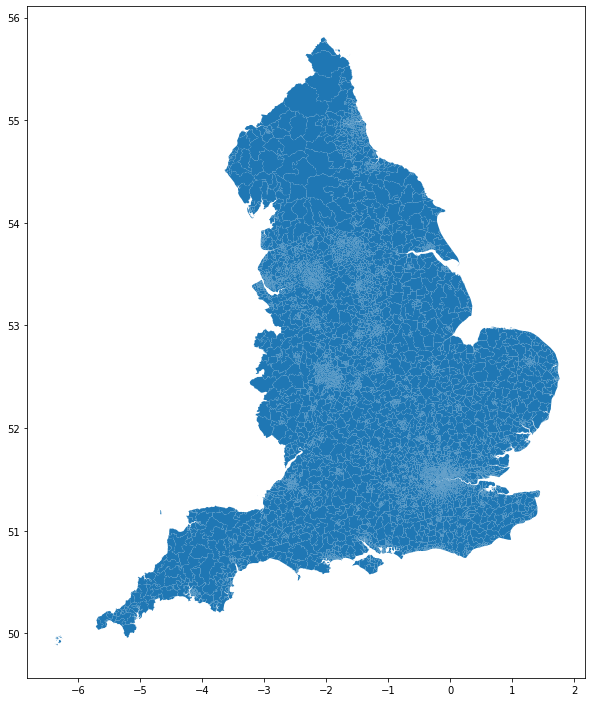

In [4]:
shapefile1_df.plot(figsize=(10, 15))
# shapefile2_df.plot(figsize=(10, 15))
# shapefile3_df.plot(figsize=(10, 15))

In [30]:
shapefile1_df.head()
# shapefile2_df.head()
# shapefile3_df.head()

id MSOA11_Code           msoa11_name  area_sq_km  \
0  msoa_wales_2011.1   W02000001  Isle of Anglesey 001      136.15   
1  msoa_wales_2011.2   W02000002  Isle of Anglesey 002      120.68   
2  msoa_wales_2011.3   W02000003  Isle of Anglesey 003        4.58   
3  msoa_wales_2011.4   W02000004  Isle of Anglesey 004       74.59   
4  msoa_wales_2011.5   W02000005  Isle of Anglesey 005       81.65   

                   local authority          x          y  \
0  Sir Ynys Mon - Isle of Anglesey  238123.32  388169.99   
1  Sir Ynys Mon - Isle of Anglesey  246434.62  384394.69   
2  Sir Ynys Mon - Isle of Anglesey  224680.76  381904.63   
3  Sir Ynys Mon - Isle of Anglesey  228678.51  382735.49   
4  Sir Ynys Mon - Isle of Anglesey  256251.21  378258.04   

                                            geometry  
0  MULTIPOLYGON (((239006.203 395294.397, 238998....  
1  MULTIPOLYGON (((247885.499 393637.102, 247871....  
2  MULTIPOLYGON (((225339.198 383395.303, 225336....  
3  MULTIPOLYGON (((231636.298 390401.688, 231631....  
4  MULTIPOLYGON (((252010.602 384388.399, 252005....

In [8]:
shapefile2_df.crs
#shapefile3_df.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49째45'N to 61째N and 9째W to 2째E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [9]:
converted_shapefile2_df = shapefile2_df.to_crs(epsg=4326)
converted_shapefile3_df = shapefile3_df.to_crs(epsg=4326)

<AxesSubplot:>

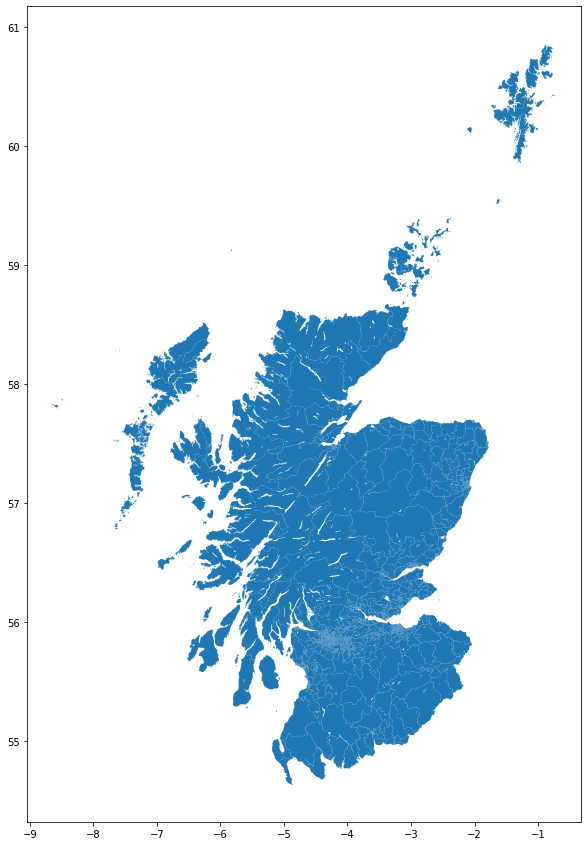

In [11]:
converted_shapefile2_df.plot(figsize=(10, 15))
# converted_shapefile3_df.plot(figsize=(10, 15))

In [14]:
# shapefile1_df.head()
# converted_shapefile2_df.head()
# converted_shapefile3_df.head()

InterZone                                               Name  TotPop2011  \
0  S02001236                                             Culter        4845   
1  S02001237               Cults, Bieldside and Milltimber West        4007   
2  S02001238               Cults, Bieldside and Milltimber East        6112   
3  S02001239                                           Garthdee        5229   
4  S02001240  Braeside, Mannofield, Broomhill and Seafield East        4419   

   ResPop2011  HHCnt2011  StdAreaKm2    StdAreaHa  \
0        4733       2143   19.553709  1955.371256   
1        3751       1428   19.758838  1975.883716   
2        5850       2291    5.275116   527.511832   
3        5152       2439    1.493716   149.371708   
4        4358       2193    0.837722    83.772094   

                                            geometry  
0  POLYGON ((-2.34262 57.13403, -2.34239 57.13402...  
1  POLYGON ((-2.26636 57.14553, -2.26648 57.14537...  
2  POLYGON ((-2.17423 57.12575, -2.17371 57.12516...  
3  POLYGON ((-2.12344 57.12742, -2.12334 57.12726...  
4  POLYGON ((-2.11316 57.13989, -2.11318 57.13983...

In [17]:
wales_msoa = converted_shapefile2_df.drop(columns=['id','msoa11_name', 'area_sq_km', 'local authority', 'x','y'])
wales_msoa2 = wales_msoa.rename(columns={'MSOA11_Code': 'code'})
scot_iz = converted_shapefile3_df.drop(columns=['TotPop2011', 'ResPop2011', 'HHCnt2011', 'StdAreaKm2', 'StdAreaHa'])
scot_iz2 = scot_iz.rename(columns={'InterZone': 'code','Name': 'areaName'})

In [18]:
wales_eng_scot_msoa = pd.concat([shapefile1_df, wales_msoa2, scot_iz2], ignore_index=True)

In [19]:
(wales_eng_scot_msoa["code"].isna() == True).sum()

0

<AxesSubplot:>

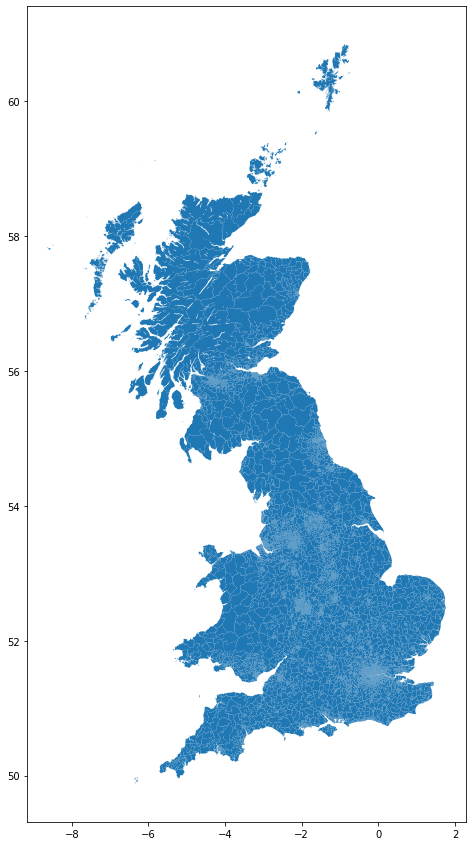

In [20]:
wales_eng_scot_msoa.plot(figsize=(10, 15))

In [21]:
wales_eng_scot_msoa.to_file("/Users/Daniel/Desktop/MSc Data Science/Dissertaton Project/Repo/Vis-EHR/Shapefile/MSOA_Wal_Eng_Scot.geojson", driver='GeoJSON')

In [22]:
wales_eng_scot_msoa.head()

code                                           geometry areaName
0  E02000001  POLYGON ((-0.09274 51.52139, -0.09453 51.52205...      NaN
1  E02000002  POLYGON ((0.14115 51.58054, 0.14180 51.58531, ...      NaN
2  E02000003  POLYGON ((0.14841 51.58075, 0.15105 51.58589, ...      NaN
3  E02000004  POLYGON ((0.19021 51.55268, 0.18475 51.55939, ...      NaN
4  E02000005  POLYGON ((0.15045 51.56561, 0.15441 51.56607, ...      NaN